In [1]:
import pandas as pd
import random

In [2]:
sampled_dates = pd.read_csv('sampled_dates.csv', parse_dates=[0]).iloc[:, 0].tolist()

In [3]:
import xarray as xr
import numpy as np
from shapely.geometry import shape
import geopandas as gpd
import os
import time
import gc

In [4]:
livinglab_geometry = gpd.read_file('livinglab_west.json')
path = 'C:/Users\PC\Documents\Ecole/2A\Stage_2A\RISE\Example\Angiosperms-model\BALTICSEA_MULTIYEAR_WAV_003_015\cmems_mod_bal_wav_my_PT1H-i_202411'
input_file = f'{path}/2015/01/CMEMS_BAL_WAV_MY_2015010201.nc'
ds = xr.open_dataset(input_file)
ds

<xarray.Dataset> Size: 1GB
Dimensions:    (lat: 775, lon: 764, time: 24)
Coordinates:
  * lat        (lat) float32 3kB 53.01 53.02 53.04 53.06 ... 65.87 65.89 65.91
  * lon        (lon) float32 3kB 9.014 9.042 9.069 9.097 ... 30.15 30.18 30.21
  * time       (time) datetime64[ns] 192B 2015-01-02T01:00:00 ... 2015-01-03
Data variables: (12/19)
    VHM0       (time, lat, lon) float32 57MB ...
    VTPK       (time, lat, lon) float32 57MB ...
    VTM10      (time, lat, lon) float32 57MB ...
    VTM02      (time, lat, lon) float32 57MB ...
    VMDR       (time, lat, lon) float32 57MB ...
    VHM0_WW    (time, lat, lon) float32 57MB ...
    ...         ...
    VTM01_SW2  (time, lat, lon) float32 57MB ...
    VMDR_SW2   (time, lat, lon) float32 57MB ...
    VSDX       (time, lat, lon) float32 57MB ...
    VSDY       (time, lat, lon) float32 57MB ...
    VMXL       (time, lat, lon) float32 57MB ...
    VCMX       (time, lat, lon) float32 57MB ...
Attributes:
    Conventions:            CF-1.0
    source:                 FMI-WAM_CMEMS
    institution:            Baltic MFC, PU Finnish Meteorological Institute
    title:                  2D - Hourly Instantaneous
    cmems_product_id:       BALTICSEA_MULTIYEAR_WAV_003_015
    westernmost_longitude:  9.0138
    easternmost_longitude:  30.2080
    southernmost_latitude:  53.0083
    northernmost_latitude:  65.9081
    grid_resolution:        1 nautical mile (ie. 0.0167 degrees northward; 0....

In [5]:
# Filter the sampled_dates list for the specified year
year_to_filter = 2016
filtered_dates = [date for date in sampled_dates if date.year == year_to_filter]
files = [f'{path}/{date.year}/{date.month:02d}/filtered_CMEMS_BAL_WAV_MY_{date.year:04d}{date.month:02d}{date.day:02d}01.nc' for date in filtered_dates]
# Open the datasets and concatenate them along the time dimension
datasets = [xr.open_dataset(file) for file in files]
# Concatenate the datasets along the 'time' dimension
combined_dataset = xr.concat(datasets, dim='time')
# Calculate the mean for each variable across time for the year
yearly_mean = combined_dataset.mean(dim='time')
yearly_mean

<xarray.Dataset> Size: 2MB
Dimensions:    (lat: 225, lon: 109)
Coordinates:
  * lat        (lat) float32 900B 55.34 55.36 55.37 55.39 ... 59.07 59.09 59.11
  * lon        (lon) float32 436B 10.04 10.07 10.1 10.12 ... 12.99 13.01 13.04
Data variables: (12/19)
    VHM0       (lat, lon) float32 98kB nan nan nan nan nan ... nan nan nan nan
    VTPK       (lat, lon) float32 98kB nan nan nan nan nan ... nan nan nan nan
    VTM10      (lat, lon) float32 98kB nan nan nan nan nan ... nan nan nan nan
    VTM02      (lat, lon) float32 98kB nan nan nan nan nan ... nan nan nan nan
    VMDR       (lat, lon) float32 98kB nan nan nan nan nan ... nan nan nan nan
    VHM0_WW    (lat, lon) float32 98kB nan nan nan nan nan ... nan nan nan nan
    ...         ...
    VTM01_SW2  (lat, lon) float32 98kB nan nan nan nan nan ... nan nan nan nan
    VMDR_SW2   (lat, lon) float32 98kB nan nan nan nan nan ... nan nan nan nan
    VSDX       (lat, lon) float32 98kB nan nan nan nan nan ... nan nan nan nan
    VSDY       (lat, lon) float32 98kB nan nan nan nan nan ... nan nan nan nan
    VMXL       (lat, lon) float32 98kB nan nan nan nan nan ... nan nan nan nan
    VCMX       (lat, lon) float32 98kB nan nan nan nan nan ... nan nan nan nan

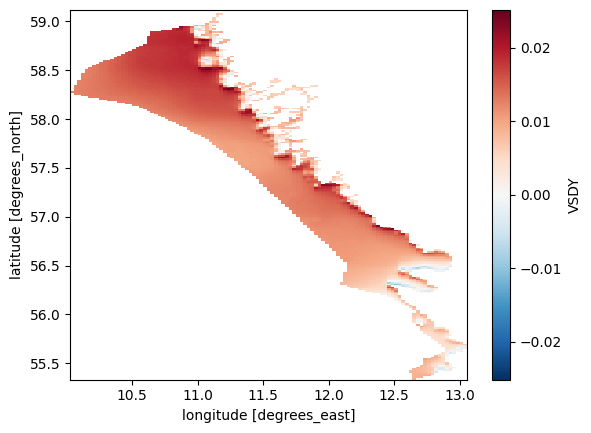

In [9]:
yearly_mean['VSDY'].plot()

In [11]:
yearly_mean.to_netcdf('C:/Users/PC/Documents/test.nc')

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\PC\\Documents\\test.nc'